In [ ]:
# https://towardsdatascience.com/gaussian-smoothing-in-time-series-data-c6801f8a4dc3
# Smooting using Gaussian Kernel

In [11]:
from datetime import datetime
import numpy as np 
import pandas as pd

owid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(owid_url)

# filtering for Nepal data
npl = df[df['iso_code'] == 'NPL']

In [12]:
npl['date'].isna().sum()

0

In [15]:
pd.options.mode.chained_assignment = None 

# converting string type to datetime 
npl['date'] = pd.to_datetime(npl['date'])

In [16]:
# calculating Gaussian kernel values 
# Days ^ 2 / ( 2 * (2 ^2))
npl['gkv'] = np.exp(
    -(((npl['date'] - datetime(2020, 10, 27)).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2)))

In [17]:
npl.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,dat,gkv
117053,NPL,Asia,Nepal,2020-01-25,1.0,1.0,NaN,NaN,NaN,NaN,...,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN,2020-01-25,0.0
117054,NPL,Asia,Nepal,2020-01-26,1.0,0.0,NaN,NaN,NaN,NaN,...,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN,2020-01-26,0.0
117055,NPL,Asia,Nepal,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,...,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN,2020-01-27,0.0
117056,NPL,Asia,Nepal,2020-01-28,1.0,0.0,NaN,NaN,NaN,NaN,...,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN,2020-01-28,0.0
117057,NPL,Asia,Nepal,2020-01-29,1.0,0.0,NaN,NaN,NaN,NaN,...,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN,2020-01-29,0.0


<AxesSubplot:xlabel='date'>

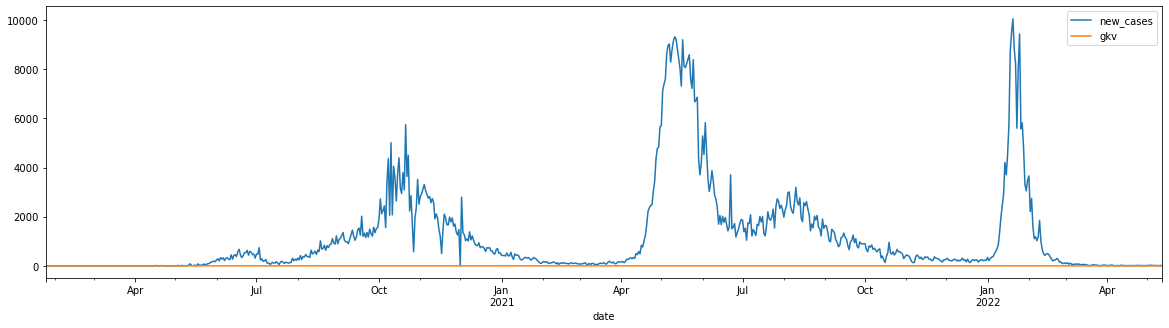

In [18]:
npl.plot(x="date", y=['new_cases',"gkv"], kind="line", figsize=(20, 5))

In [19]:
npl['gkv'] = npl['gkv'] / npl['gkv'].sum()

(npl['new_cases'] * npl['gkv']).sum()

2035.7719520837854

<AxesSubplot:xlabel='date'>

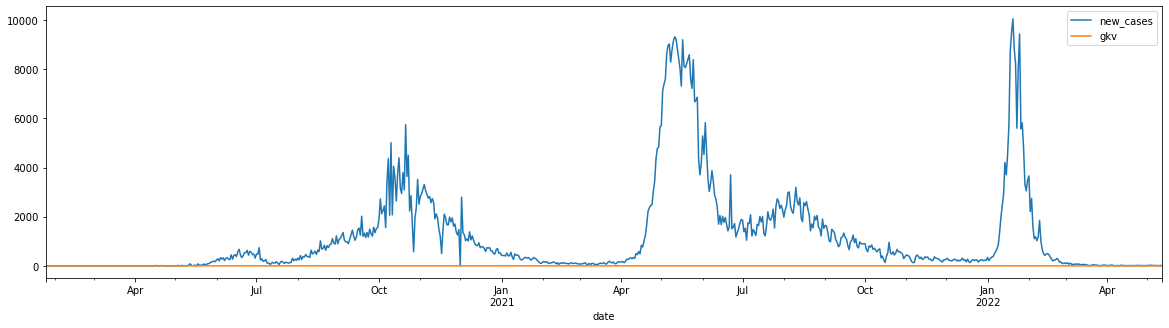

In [20]:
npl.plot(x="date", y=['new_cases',"gkv"], kind="line", figsize=(20, 5))

In [21]:
smoothed_cases = []
for date in sorted(npl['date']):
    npl['gkv'] = np.exp(
        -(((npl['date'] - date).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2))
    )
    npl['gkv'] /= npl['gkv'].sum()
    smoothed_cases.append(round(npl['new_cases'] * npl['gkv']).sum())

npl['smoothed_new_cases'] = smoothed_cases

<AxesSubplot:xlabel='date'>

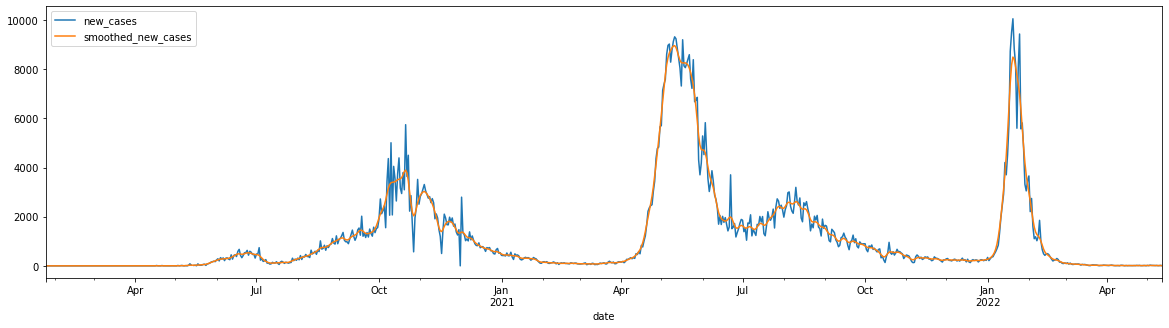

In [22]:
npl.plot(x="date", y=['new_cases',"smoothed_new_cases"], kind="line", figsize=(20, 5))

In [23]:
smoothed_cases = []
for date in sorted(npl['date']):
    npl['gkv'] = np.exp(
        -(((npl['date'] - date).apply(lambda x: x.days)) ** 2) / (2 * (4 ** 4))
    )
    npl['gkv'] /= npl['gkv'].sum()
    smoothed_cases.append(round(npl['new_cases'] * npl['gkv']).sum())

npl['smoothed_new_cases1'] = smoothed_cases

<AxesSubplot:xlabel='date'>

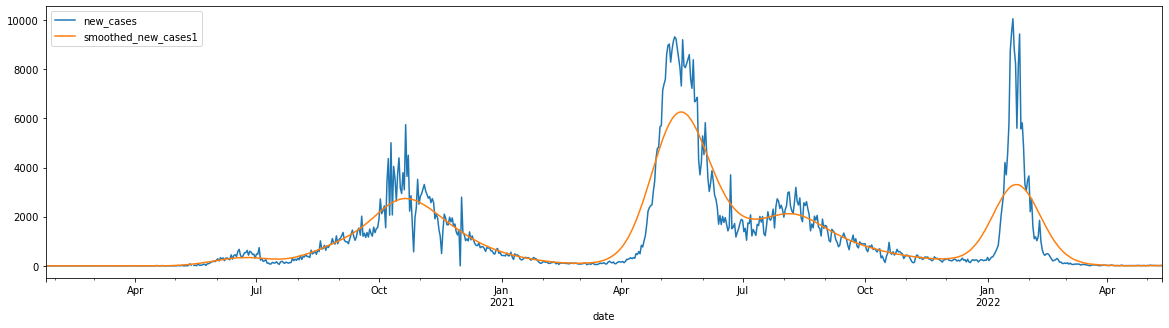

In [24]:
npl.plot(x="date", y=['new_cases',"smoothed_new_cases1"], kind="line", figsize=(20, 5))